In [1]:
import pandas as pd

df = pd.read_csv('normalized_feature_set.csv', encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35148 entries, 0 to 35147
Data columns (total 11 columns):
indicator_types.value                                35148 non-null object
kill_chain_phases.kill_chain_phases.ordinality       35148 non-null float64
ip_score                                             35148 non-null float64
url_score                                            35148 non-null float64
observable.object.properties.hashes.type.value       35148 non-null int64
observable.object.properties.header.subject.value    35148 non-null int64
observable.object.properties.size_in_bytes.value     35148 non-null float64
tlp_marking_color                                    35148 non-null object
target                                               35148 non-null object
hash_score                                           35148 non-null float64
file_type                                            35148 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 2.9+ MB


In [35]:
feature_list = [#'kill_chain_phases.kill_chain_phases.ordinality',
                'ip_score',
                'url_score',
                'observable.object.properties.hashes.type.value',
                'observable.object.properties.header.subject.value',
                'observable.object.properties.size_in_bytes.value',
                'hash_score',
                'file_type'
               ]
X = df[feature_list]
#Y = df['indicator_types.value']

In [24]:
cat_columns = ['indicator_types.value']

for col in list(cat_columns):
    df[col] = df[col].astype('category')

# Assigning a code to each category for the model to learn it easily
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
Y = df['indicator_types.value']

In [25]:
from sklearn import preprocessing

# Set charts to view inline
%matplotlib inline

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
X_scaled = min_max_scaler.fit_transform(X)

# Run the normalizer on the dataframe
X_normalized = pd.DataFrame(X_scaled)

X_normalized.head()

,0,1,2,3,4,5,6
0,0.75000,0.0,0.0,0.0,0.0,0.0,0.0
1,1.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.75000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.75000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.87852,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.5)

For Numerical Data

accuracy of "KNeighbors" model is 0.930636167065
accuracy of "Random Forest" model is 0.932741550017
accuracy of "Neural Networks" model is 0.929156708774
accuracy of "SVM" model is 0.928872197565




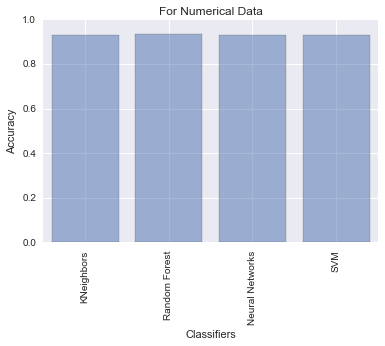

In [27]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn

names = ["KNeighbors", "Random Forest", "Neural Networks", "SVM"]
y_pos = np.arange(len(names))

classifiers = [
    KNeighborsClassifier(10),
    RandomForestClassifier(n_estimators=50),
    MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(40, 20), random_state=1),
    SVC(C=100.),
    ]   

test = pd.DataFrame(names)
accuracy1 = []
accuracy2 = []
accuracy3 = []

print "For Numerical Data\n"
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    accu = metrics.accuracy_score(clf.predict(X_test), y_test)
    print 'accuracy of "{}" model is {}' .format(name, accu)
    accuracy1.append(accu)
    #print name
print "\n"

plt.ylim([0, 1])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('For Numerical Data')
plt.bar(y_pos, accuracy1, align='center', alpha=0.5)
plt.xticks(y_pos, names, rotation='vertical')
plt.show()

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.grid_search import GridSearchCV

clf = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)
all_predictions = clf.predict(X_test)

In [30]:
from sklearn.metrics import classification_report
print classification_report(y_test, all_predictions)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        96
          1       0.48      0.10      0.16       112
          3       0.82      0.46      0.59      1376
          4       0.85      0.78      0.81       217
          5       0.00      0.00      0.00         4
          6       0.94      1.00      0.97     15400
          7       0.94      0.58      0.71       154
          8       0.76      0.67      0.71       110
          9       0.52      0.13      0.21       105

avg / total       0.92      0.93      0.92     17574



In [36]:
X.iloc[1]

ip_score                                             1.0
url_score                                            0.0
observable.object.properties.hashes.type.value       0.0
observable.object.properties.header.subject.value    0.0
observable.object.properties.size_in_bytes.value     0.0
hash_score                                           0.0
file_type                                            0.0
Name: 1, dtype: float64